In [2]:
from google.colab import drive
drive.mount('/drive')

import numpy as np
import pandas as pd

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
path='/drive/MyDrive/Colab Notebooks/bike.csv'
df=pd.read_csv(path)

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df.shape

(731, 16)

In [4]:
Y = df['cnt']
X = df.drop(["cnt","instant", "dteday"],axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3, random_state=0)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers

In [7]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [14]:
def create_model(activation ='relu', optimizer='adam', dropout_rate=0.1):
  model = Sequential()
  model.add(Dense(200,input_dim=13, activation =activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(200, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(200, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation=activation))

  model.compile(loss='mae', optimizer = optimizer, metrics=['mae'])
  return model

In [15]:
# create model
model1= KerasRegressor(model=create_model, loss ='mae', epochs = 20, batch_size =100, verbose=0)

#define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam']
activation = ['relu','elu','linear']
dropout_rate =[0.1,0.3,0.5]
epochs = [20,50,90]
param_grid = dict(optimizer = optimizer, model__activation=activation, model__dropout_rate=dropout_rate, epochs = epochs)
grid = GridSearchCV(estimator = model1, param_grid = param_grid, n_jobs = -1, cv =3)
grid_result = grid.fit(X_train, Y_train)

In [16]:
print("Best:%f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with : %r" % (mean, stdev, param))

Best:0.999209 using {'epochs': 90, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'optimizer': 'RMSprop'}
0.991204 (0.007621) with : {'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'SGD'}
0.995380 (0.004817) with : {'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'RMSprop'}
0.994443 (0.002775) with : {'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'Adam'}
0.844652 (0.044409) with : {'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.3, 'optimizer': 'SGD'}
0.878379 (0.054594) with : {'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.3, 'optimizer': 'RMSprop'}
0.904943 (0.023475) with : {'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.3, 'optimizer': 'Adam'}
0.554588 (0.067024) with : {'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'optimizer': 'SGD'}
0.451451 (0.132561) with : {'epochs': 2

In [38]:
from keras.callbacks import EarlyStopping

In [12]:
  model = Sequential()
  activation ='linear'
  optimizer = 'Adam'

  model.add(Dense(100,input_dim=13, activation =activation))
 
  model.add(Dense(100, activation=activation))

  model.add(Dense(100, activation=activation))
  
  model.add(Dense(1, activation=activation))

  model.compile(loss='mae', optimizer = optimizer, metrics=['mae'])

In [13]:
model.compile(loss='mae',metrics=['mae'],optimizer = optimizer)
Test1 = model.fit(X_train,Y_train, epochs =500, batch_size =100, validation_data = (X_test, Y_test))

Epoch 1/500
6/6 [==============================] - 1s 27ms/step - loss: 2750.8926 - mae: 2750.8926 - val_loss: 1412.4832 - val_mae: 1412.4832
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 1104.9836 - mae: 1104.9836 - val_loss: 654.3031 - val_mae: 654.3031
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 711.1682 - mae: 711.1682 - val_loss: 325.6828 - val_mae: 325.6828
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 446.3883 - mae: 446.3883 - val_loss: 206.8647 - val_mae: 206.8647
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 314.4795 - mae: 314.4795 - val_loss: 178.7873 - val_mae: 178.7873
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 138.7069 - mae: 138.7069 - val_loss: 86.0037 - val_mae: 86.0037
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 108.1527 - mae: 108.1527 - val_loss: 59.3752 - val_mae: 59.3752
Epoch 8/500
6/6 [====================

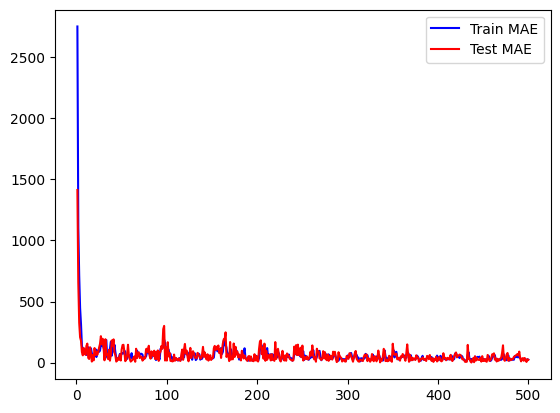

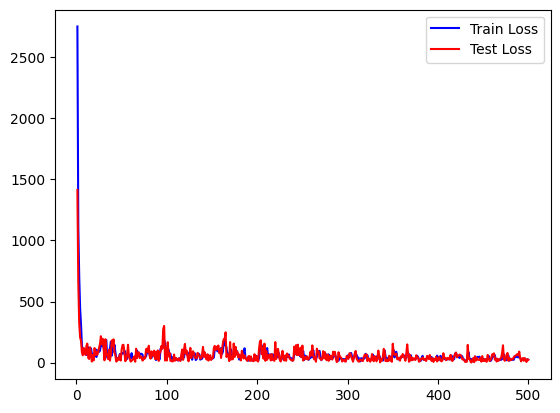

In [14]:
import matplotlib.pyplot as plt
acc2 = Test1.history['mae']
val_acc = Test1.history['val_mae']
loss2 = Test1.history['loss']
val_loss= Test1.history['val_loss']

epochs =range(1,len(acc2)+1)
plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Test Loss')
plt.legend()
plt.show()